# IMT 573 - Problem Set 6 - Statistical Learning

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Steve Gonzales Collaborators: None 

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

To gain some context for this problem set, read the below quote from [this paper](https://www.jstor.org/stable/41465842):

_Regression analysis, one of the most useful techniques in statistics, is applied in many disparate situations. It is used to explain the influence an independent variable may have on the variability of outcome variances. This technique serves us well not only in explaining variability, but also in projecting the future. The label regression survives, buts its backward connotation is too narrow to properly describe how the technique is used today. In fact, the name came about much later than the method itself, and was coined by Francis Galton in his study of eugenics. He was trying to explain data that showed that offspring of tall parents were, on average, not as tall as their parents, and, at the same time, the offspring of short parents were, on average, not as short as their parents, even though the generational average remained the same. This phenomenon, where the offspring might be viewed as tending toward the population average, is presently referred to as regression toward the mean,
although it started off as "regression to mediocrity". Galton explained this phenomenon in great detail in 1886, and it was later exemplified by a study that was the subject of a seminal paper by Karl Pearson and Alice Lee._

It must be noted that the study of eugenics and the optimization of human gene pools has since been deemed unscientific, unethical, and racially biased. It is not a focus for this problem set. 

Instead, we will focus on the phenomenon of genetic inheritance. Specifically, we will analyze the dataset of fathers' and sons' heights used by Pearson and Lee (as referenced in the quote above). It contains two variables, fathers' height and sons' height. If you take a simple mean, you see that on average sons are taller than fathers. But can this difference just be due to chance?

### Problem 1: Load and examine data

#### (a) Load the data

Load the data from the `fatherson.csv` file. Describe what you see in the data. Units aren't given for the columns - given your understanding of human height, what unit do you think the data uses? Are there any missing data or data that appear to be erroneous?

In [13]:
df_fatherson = pd.read_csv('fatherson.csv')
df_fatherson.head(10)

,fheight\tsheight
0,165.2\t151.8
1,160.7\t160.6
2,165\t160.9
3,167\t159.5
4,155.3\t163.3
5,160.1\t163.2
6,166\t162.8
7,164.4\t162.5
8,167.8\t164.1
9,170.1\t162.5


The data is jammed into a single column with what is the notation for a tab (char(9)).<p>
The data looks to be in centimeters (cm).

In [14]:
df_fatherson[['father', 'son']] = df_fatherson['fheight\tsheight'].str.split('\t', expand=True)
display(df_fatherson)
df_fatherson.value_counts()

,fheight\tsheight,father,son
0,165.2\t151.8,165.2,151.8
1,160.7\t160.6,160.7,160.6
2,165\t160.9,165,160.9
3,167\t159.5,167,159.5
4,155.3\t163.3,155.3,163.3
...,...,...,...
1073,170.2\t179.7,170.2,179.7
1074,181.2\t173.4,181.2,173.4
1075,182.3\t176,182.3,176
1076,179.7\t176,179.7,176


fheight\tsheight  father  son  
163.9\t173.6      163.9   173.6    2
175.4\t185.9      175.4   185.9    2
176.7\t181.9      176.7   181.9    2
162.8\t166.7      162.8   166.7    2
173\t170          173     170      2
                                  ..
169\t168.8        169     168.8    1
169\t169.5        169     169.5    1
169\t171.3        169     171.3    1
169\t172.3        169     172.3    1
191.6\t178        191.6   178      1
Name: count, Length: 1069, dtype: int64

In [15]:
na_count_father = df_fatherson['father'].isna().sum()
print(f"Bad father data as a % of total: {na_count_father/len(df_fatherson):%}")
na_count_son = df_fatherson['son'].isna().sum()
print(f"Bad son data as a % of total: {na_count_son/len(df_fatherson):%}")

Bad father data as a % of total: 0.000000%
Bad son data as a % of total: 0.000000%


In [16]:
# See if there are any numbers that not possible, e.g. 40 or 260cm (5" taller than the tallest human)
# Convert to numeric
df_fatherson['father'] = pd.to_numeric(df_fatherson['father'], errors='coerce')  # errors='coerce' handles non-numeric data
df_fatherson['son'] = pd.to_numeric(df_fatherson['son'], errors='coerce')
filtered_df = df_fatherson[((df_fatherson['father'] < 40) | (df_fatherson['father'] > 260)) | 
                 ((df_fatherson['son'] < 40) | (df_fatherson['son'] > 260))]

print(filtered_df)

Empty DataFrame
Columns: [fheight	sheight, father, son]
Index: []


#### (b) Create density plots

Create a density plot of the data such that the distribution of fathers' and sons' heights are overlayed on the same plot. What do the distributions look like? What are the means and medians of the distributions?

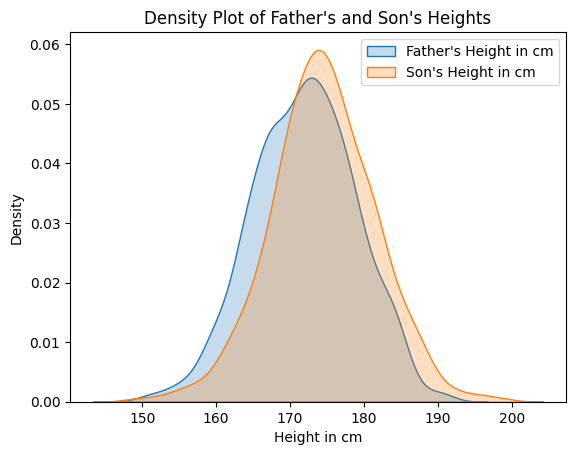

Father's Height - Mean: 171.93, Median: 172.10
Son's Height - Mean: 174.46, Median: 174.30


In [17]:
# --- Create the density plot ---
sns.kdeplot(df_fatherson['father'], label="Father's Height in cm", fill=True)
sns.kdeplot(df_fatherson['son'], label="Son's Height in cm", fill=True)
plt.xlabel("Height in cm")
plt.ylabel("Density")
plt.title("Density Plot of Father's and Son's Heights")
plt.legend()
plt.show()

# --- Calculate means and medians ---
fheight_mean = df_fatherson['father'].mean()
fheight_median = df_fatherson['father'].median()
sheight_mean = df_fatherson['son'].mean()
sheight_median = df_fatherson['son'].median()

print(f"Father's Height - Mean: {fheight_mean:.2f}, Median: {fheight_median:.2f}")
print(f"Son's Height - Mean: {sheight_mean:.2f}, Median: {sheight_median:.2f}")


This clearly shows the sons' height is greater than that of the fathers' because the orange is both higher and to the right.

### Problem 2: Perform t-test

#### (a) Compute t-statistic

Is this difference statistically significant? Let’s do a t-test. Compute the t-statistic yourself - do not use any pre-existing functions that perform the calculation directly! To do this, first calculate a pooled standard error. Then, calculate the t-statistic using the difference of the means and the pooled standard error. What do you find? Why do we use a pooled standard deviation?

In [18]:
# T- Test

# Calculate the Pooled Standard Error, which is sqrt(((n1 – 1) x (s1)² + (n2 – 1) x (s2)²)/(n1 + n2 - 2) * (1/n1+1/n2))
# n1=Fathers, n2=Sons, s1=Standard deviation of fathers, s2=Standard deviation of sons
n1 = len(df_fatherson['father'])
n2 = len(df_fatherson['son'])
s1 = df_fatherson['father'].std()
s2 = df_fatherson['son'].std()
pooled_variance = (((n1 - 1) * s1**2) + ((n2 - 1) * s2**2)) / (n1 + n2 - 2)
pse = np.sqrt(pooled_variance * (1/n1 + 1/n2))
print(f"Pooled Standard Error={pse:,.4f}")
m1 = df_fatherson['father'].mean()
m2 = df_fatherson['son'].mean()

t_stat = (m1 - m2) / pse
print(f"T-statistic: {t_stat:.4f}")

Pooled Standard Error=0.3042
T-statistic: -8.3239


The difference between the two sample means is extremely small relative to the variation in the data, meaning there’s little statistical evidence to suggest a meaningful difference between the groups.<p>
So there is not a statistical difference between the two sets of data.<p>
We use this when we expect the variances in each sample to be similar.<p>
Pooled Standard Deviation smoothes out "noise" in the data and minimizes variability.

#### (b) Verify t-statistic

Now, verify your t-statistic calculation using the `scipy.stats.ttest_ind` function. Interpret the p-value that is calculated.

In [19]:
t_stat, p_value = stats.ttest_ind(df_fatherson['father'], df_fatherson['son'])
print(t_stat, p_value)

-8.323870333757974 1.4923127818827989e-16


The p-value is extremely small, indicating that there is not a large statistical difference in the two sets of data. I.e. the data sets are very similar.

### Problem 3: A Monte Carlo approach

Next, let's run some Monte Carlo analysis to further examine this data. 

#### (a) Create distributions

First, compute the overall mean and standard deviation of combined fathers' and sons' heights. Now create two sets of normal random variables of length 1100, both with the same mean and standard deviation that you just computed above. Call one of these `fathers` and the other `sons`. What is the father-son mean difference? Compare the result with that you found in the previous problem.

HINT: Be sure to set the seed for reproducibility

In [20]:
# Create a new DF with all the heights in one column
combined_height = pd.concat([df_fatherson['father'], df_fatherson['son']], ignore_index=True)
# Calculate the average
fatherson_mean = combined_height.mean()
print(f'Overall mean: {fatherson_mean:,.2f}. Fathers={m1:,.2f}  Sons={m2:,.2f}')
print(f'Mean difference = {m1-m2}')

# Create two random data sets similar to above
np.random.seed(56)  # For reproducibility
fathers = np.random.normal(loc=m1, scale=s1, size=1100)
sons = np.random.normal(loc=m2, scale=s2, size=1100)
new_fatherson_mean = np.concatenate((fathers, sons)).mean()
new_m1 = fathers.mean()
new_m2 = sons.mean()
print("For the new made up data")
print(f'Overall mean: {new_fatherson_mean:,.2f}. Fathers={new_m1:,.2f}  Sons={new_m2:,.2f}')
print(f'Mean difference = {new_m1-new_m2}')

Overall mean: 173.19. Fathers=171.93  Sons=174.46
Mean difference = -2.5320037105751396
For the new made up data
Overall mean: 173.28. Fathers=172.03  Sons=174.53
Mean difference = -2.504366656308747


The difference in means is nearly identical.

#### (b) Run Monte Carlo simulations

Now repeat the previous question a large number of times R (1000 or more). Each time, store the difference between the father and son distributions. Plot the distribution of the differences. What is the mean of the difference values? Compare the mean and standard deviations to the calculations performed on the father-son dataset.

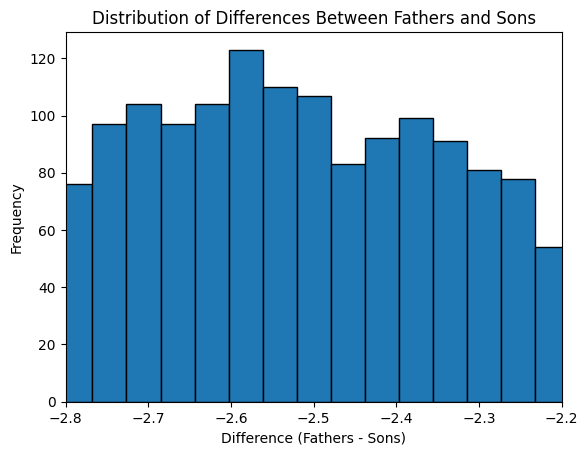

Mean of Differences: -2.5409040661398103
Standard Deviation of Differences: 0.29911786146149344


In [21]:
mean_diffs = []
for i in range(2001):
    fathers = np.random.normal(loc=m1, scale=s1, size=1100)
    sons = np.random.normal(loc=m2, scale=s2, size=1100)
    mean_diffs.append(fathers.mean()-sons.mean())
    
# Plot the distribution of the differences
plt.hist(mean_diffs, bins=50, edgecolor='black')
plt.title('Distribution of Differences Between Fathers and Sons')
plt.xlabel('Difference (Fathers - Sons)')
plt.ylabel('Frequency')
plt.xlim(-2.8, -2.2)  # Adjust this range as needed
plt.show()

# Calculate the mean and standard deviation of the differences
mean_diff = np.mean(mean_diffs)
std_diff = np.std(mean_diffs)

print(f"Mean of Differences: {mean_diff}")
print(f"Standard Deviation of Differences: {std_diff}")

The Mean of Differences now gets much closer to the original data set, which is what I would expect from running this many times.

#### (c) Calculate percentiles

Calculate the 90th, 95th, and 99th percentiles as well as the maximum of the distribution of differences. How do these compare to the differences calculated from the dataset? Given this, what can you say about the dataset that was examined?

In [22]:
# Original Data set
df_fatherson['diff'] = df_fatherson['father'] - df_fatherson['son']
differences = np.array(df_fatherson['diff'])
percentile_90 = np.percentile(differences, 90)
percentile_95 = np.percentile(differences, 95)
percentile_99 = np.percentile(differences, 99)
max_difference = np.min(differences)

# Print the results
print("Original Data Set")
print(f"90th Percentile: {percentile_90}")
print(f"95th Percentile: {percentile_95}")
print(f"99th Percentile: {percentile_99}")
print(f"Maximum Difference: {max_difference}")

# Monte Carlo data set
differences = np.array(mean_diffs)

# Calculate the percentiles and maximum
percentile_90 = np.percentile(differences, 90)
percentile_95 = np.percentile(differences, 95)
percentile_99 = np.percentile(differences, 99)
max_difference = np.min(differences)

# Print the results
print('\n' + "Monte Carlo Data Set")
print(f"90th Percentile: {percentile_90}")
print(f"95th Percentile: {percentile_95}")
print(f"99th Percentile: {percentile_99}")
print(f"Maximum Difference: {max_difference}")

Original Data Set
90th Percentile: 6.06000000000001
95th Percentile: 9.0
99th Percentile: 13.923000000000005
Maximum Difference: -28.600000000000023

Monte Carlo Data Set
90th Percentile: -2.152667433810251
95th Percentile: -2.0369348329413413
99th Percentile: -1.8543082400296669
Maximum Difference: -3.674426206501863


The difference between the original data and the Monte Carlo is that the Monte Carlo data has a much smaller range of values. In addition it seems that the differences in the 90th percentile and above were all father shorter than son, where as in the original data set it is the opposite.<p>
I honestly, do not know how this relates to the original data set?